In [1]:
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns        # For statistical data visualization

In [2]:
train = pd.read_csv('../dataset/Training.csv')
test = pd.read_csv('../dataset/Training.csv')

print("Train Data:")
print(train.head())

print("\nTest Data:")
print(test.head())


Train Data:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_li

In [3]:
print("Train DataFrame Info:")
print(train.info())
print()
print("Testing DataFrame Info:")
print(test.info())
print()
print("Training DataFrame Null Values:")
print(train.isnull().sum())
print()
print("Testing DataFrame Null Values:")
print(test.isnull().sum())
print()

Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
None

Testing DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
None

Training DataFrame Null Values:
itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

Testing DataFrame Null Values:
itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                    

In [4]:
train = train.drop(columns=['Unnamed: 133'])
test = test.drop(columns=['Unnamed: 133'])

print("Train DataFrame Columns After Dropping 'Unnamed: 133':")
print(train.columns)

print("\n")

print("Test DataFrame Columns After Dropping 'Unnamed: 133':")
print(test.columns)

Train DataFrame Columns After Dropping 'Unnamed: 133':
Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


Test DataFrame Columns After Dropping 'Unnamed: 133':
Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [5]:
# 5.1. Generate Descriptive Statistics for the Train Dataset
print("Descriptive Statistics for Train Dataset:")
print(train.describe())

Descriptive Statistics for Train Dataset:
           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.36866

In [6]:
# 5.2. Analyze the Target Variable ('prognosis') in Train Dataset
print("Prognosis Value Counts in Train Dataset:")
print(train['prognosis'].value_counts())

Prognosis Value Counts in Train Dataset:
prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis

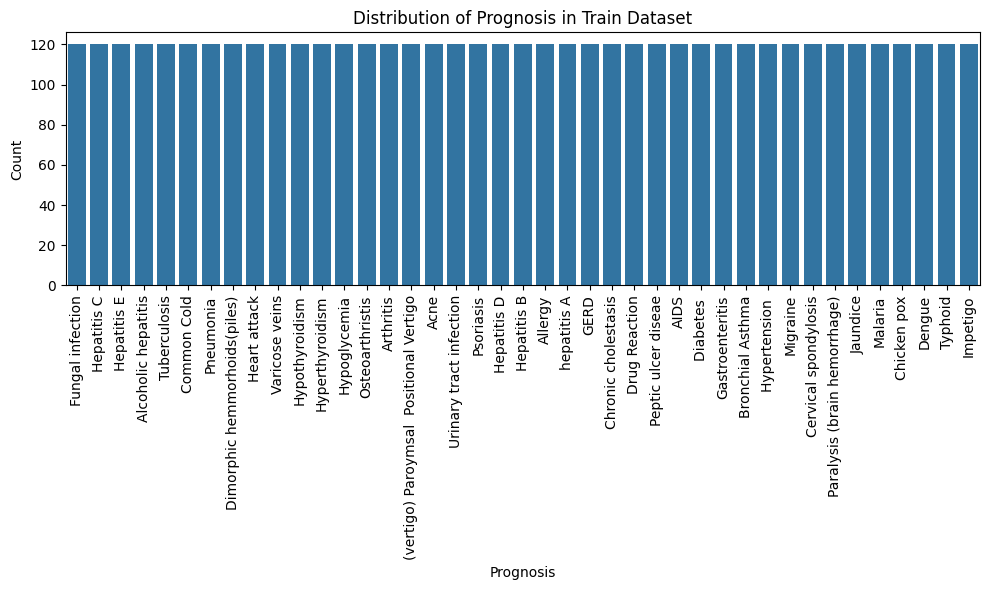

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='prognosis', order=train['prognosis'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Prognosis in Train Dataset')
plt.xlabel('Prognosis')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the 'prognosis' column in the train dataset
train['prognosis_encoded'] = le.fit_transform(train['prognosis'])

# If the test dataset also contains the 'prognosis' column (though typically test sets don't have targets),
# you can transform it as well. If test 'prognosis' is NaN or not present, skip this step.
# Uncomment the following lines if applicable:
# test['prognosis_encoded'] = le.transform(test['prognosis'])

# Display the mapping of classes to numerical labels
print("Prognosis Encoding Mapping:")
for class_label, encoded_label in zip(le.classes_, range(len(le.classes_))):
    print(f"{class_label} --> {encoded_label}")

print("\n")

# Display the first few rows to verify encoding
print("Train Data with Encoded 'prognosis':")
print(train[['prognosis', 'prognosis_encoded']].head())


Prognosis Encoding Mapping:
(vertigo) Paroymsal  Positional Vertigo --> 0
AIDS --> 1
Acne --> 2
Alcoholic hepatitis --> 3
Allergy --> 4
Arthritis --> 5
Bronchial Asthma --> 6
Cervical spondylosis --> 7
Chicken pox --> 8
Chronic cholestasis --> 9
Common Cold --> 10
Dengue --> 11
Diabetes  --> 12
Dimorphic hemmorhoids(piles) --> 13
Drug Reaction --> 14
Fungal infection --> 15
GERD --> 16
Gastroenteritis --> 17
Heart attack --> 18
Hepatitis B --> 19
Hepatitis C --> 20
Hepatitis D --> 21
Hepatitis E --> 22
Hypertension  --> 23
Hyperthyroidism --> 24
Hypoglycemia --> 25
Hypothyroidism --> 26
Impetigo --> 27
Jaundice --> 28
Malaria --> 29
Migraine --> 30
Osteoarthristis --> 31
Paralysis (brain hemorrhage) --> 32
Peptic ulcer diseae --> 33
Pneumonia --> 34
Psoriasis --> 35
Tuberculosis --> 36
Typhoid --> 37
Urinary tract infection --> 38
Varicose veins --> 39
hepatitis A --> 40


Train Data with Encoded 'prognosis':
          prognosis  prognosis_encoded
0  Fungal infection                 15

In [9]:
X = train.drop(['prognosis', 'prognosis_encoded'], axis=1)
y = train['prognosis_encoded']

# Display the shapes of X and y to verify
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Display the first few rows of X
print("\nFirst 5 rows of Features (X):")
print(X.head())

# Display the first few rows of y
print("\nFirst 5 rows of Target (y):")
print(y.head())

Features (X) shape: (4920, 132)
Target (y) shape: (4920,)

First 5 rows of Features (X):
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   pus_fi

In [10]:
# 8.1. Identify Duplicate Records in Features (X) Only

# Check for duplicate rows in X based on features only
duplicate_features = X.duplicated()
duplicate_count = duplicate_features.sum()
print(f"Number of duplicate records in Features (X): {duplicate_count}")

# If duplicates exist, proceed to verify their prognosis consistency
if duplicate_count > 0:
    # Extract duplicate records
    duplicates = X[duplicate_features]
    duplicate_indices = duplicates.index
    duplicate_prognoses = y[duplicate_indices]
    
    # Combine features and prognosis for duplicates
    duplicate_data = duplicates.copy()
    duplicate_data['prognosis_encoded'] = duplicate_prognoses.values
    
    # Check if all duplicates have the same prognosis
    prognosis_consistency = duplicate_data.groupby(list(X.columns)).agg({'prognosis_encoded': 'nunique'})
    
    # Identify symptom patterns with inconsistent prognosis labels
    inconsistent_duplicates = prognosis_consistency[prognosis_consistency['prognosis_encoded'] > 1]
    inconsistent_count = len(inconsistent_duplicates)
    
    print(f"Number of duplicate symptom patterns with inconsistent prognosis: {inconsistent_count}")
    
    if inconsistent_count > 0:
        print("There are duplicate symptom patterns with different prognosis labels. These should NOT be removed as duplicates.")
    else:
        print("All duplicate symptom patterns have consistent prognosis labels. Safe to remove duplicates.")
        
        # Proceed to remove duplicates
        X = X.drop_duplicates().reset_index(drop=True)
        y = y.loc[X.index].reset_index(drop=True)
        print(f"Duplicates removed. New Features shape: {X.shape}")
        print(f"Corresponding Target shape: {y.shape}")
else:
    print("No duplicate records found in Features (X).")


Number of duplicate records in Features (X): 4616
Number of duplicate symptom patterns with inconsistent prognosis: 0
All duplicate symptom patterns have consistent prognosis labels. Safe to remove duplicates.
Duplicates removed. New Features shape: (304, 132)
Corresponding Target shape: (304,)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 9.1. Compute the Correlation Matrix
correlation_matrix = X.corr().abs()

# Since the correlation matrix is symmetric, we'll extract the upper triangle
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# 9.2. Identify Highly Correlated Feature Pairs (e.g., correlation > 0.8)
threshold = 0.8
high_corr_pairs = [
    (column, row, upper_triangle.loc[row, column])
    for column in upper_triangle.columns
    for row in upper_triangle.index
    if upper_triangle.loc[row, column] > threshold
]

# Print the highly correlated feature pairs
if high_corr_pairs:
    print(f"Highly correlated feature pairs (Correlation > {threshold}):\n")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.2f}")
else:
    print(f"No feature pairs found with correlation greater than {threshold}.")

Highly correlated feature pairs (Correlation > 0.8):

cold_hands_and_feets and weight_gain: Correlation = 0.85
back_pain and pain_behind_the_eyes: Correlation = 0.81
redness_of_eyes and throat_irritation: Correlation = 1.00
sinus_pressure and throat_irritation: Correlation = 1.00
sinus_pressure and redness_of_eyes: Correlation = 1.00
runny_nose and throat_irritation: Correlation = 1.00
runny_nose and redness_of_eyes: Correlation = 1.00
runny_nose and sinus_pressure: Correlation = 1.00
congestion and throat_irritation: Correlation = 1.00
congestion and redness_of_eyes: Correlation = 1.00
congestion and sinus_pressure: Correlation = 1.00
congestion and runny_nose: Correlation = 1.00
bruising and cramps: Correlation = 0.85
swollen_legs and cramps: Correlation = 0.85
swollen_legs and bruising: Correlation = 0.85
swollen_blood_vessels and cramps: Correlation = 0.85
swollen_blood_vessels and bruising: Correlation = 0.85
swollen_blood_vessels and swollen_legs: Correlation = 0.85
puffy_face_an

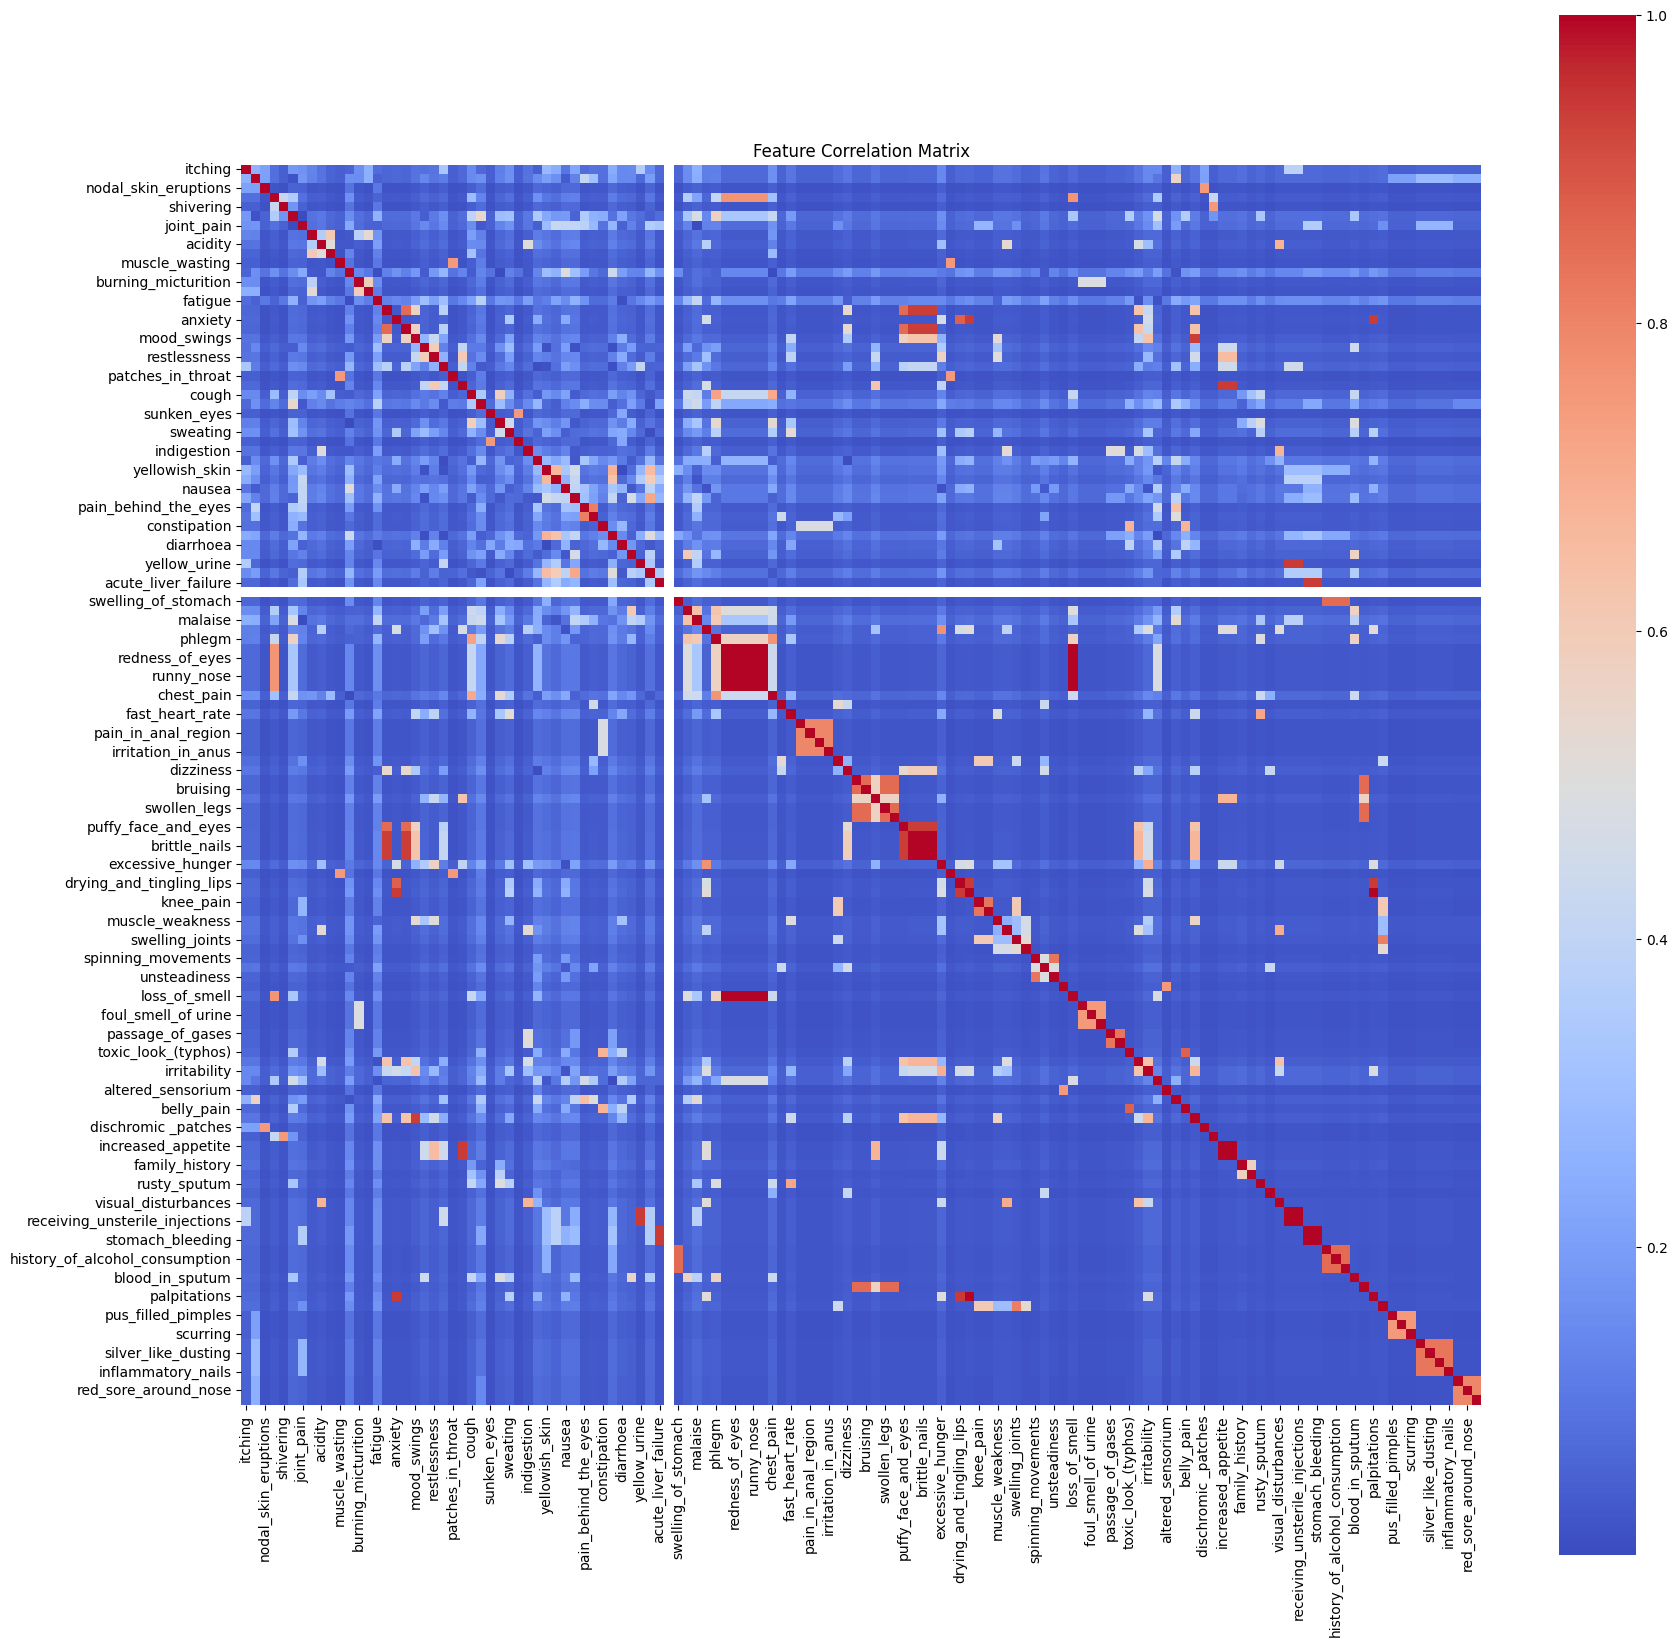

In [12]:
# 9.3. (Optional) Visualize the Correlation Matrix
# Due to the large number of features, a full heatmap may not be readable.
# Instead, you can visualize a subset or skip this step.

# Uncomment the following lines to visualize (might be cluttered)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [13]:
# 10.2. Automated Removal of Highly Correlated Features

# Recompute the correlation matrix
correlation_matrix = X.corr().abs()

# Set the threshold for high correlation
threshold = 0.8

# Create a set to hold features to be removed
to_remove = set()

# Iterate over the correlation matrix and add features to the remove set
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            # If neither feature is already marked for removal, decide which one to remove
            if feature1 not in to_remove and feature2 not in to_remove:
                # Optionally, decide which feature to remove based on some criteria
                # Here, we'll remove feature2
                to_remove.add(feature2)

# Print the list of features to remove
print(f"Number of features to remove: {len(to_remove)}")
print("Features to be removed due to high correlation:")
for feature in to_remove:
    print(feature)

# Remove the features from X
X_reduced = X.drop(columns=list(to_remove))

# Display the new shape of X
print(f"\nNew Features (X_reduced) shape: {X_reduced.shape}")


Number of features to remove: 36
Features to be removed due to high correlation:
spinning_movements
acute_liver_failure
mood_swings
silver_like_dusting
throat_irritation
distention_of_abdomen
congestion
swelling_joints
cramps
enlarged_thyroid
irregular_sugar_level
toxic_look_(typhos)
pain_behind_the_eyes
swollen_blood_vessels
skin_peeling
small_dents_in_nails
redness_of_eyes
sinus_pressure
swollen_legs
anxiety
runny_nose
puffy_face_and_eyes
coma
increased_appetite
yellow_urine
history_of_alcohol_consumption
brittle_nails
swelling_of_stomach
receiving_blood_transfusion
knee_pain
weight_gain
slurred_speech
bruising
drying_and_tingling_lips
passage_of_gases
cold_hands_and_feets

New Features (X_reduced) shape: (304, 96)


In [14]:
from sklearn.model_selection import train_test_split

# 11.1. Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

# Display the shapes of the splits
print(f"Training Features shape: {X_train.shape}")
print(f"Validation Features shape: {X_val.shape}")
print(f"Training Target shape: {y_train.shape}")
print(f"Validation Target shape: {y_val.shape}")

# (Optional) Verify class distribution in training and validation sets
print("\nClass distribution in Training set:")
print(y_train.value_counts())

print("\nClass distribution in Validation set:")
print(y_val.value_counts())


Training Features shape: (243, 96)
Validation Features shape: (61, 96)
Training Target shape: (243,)
Validation Target shape: (61,)

Class distribution in Training set:
prognosis_encoded
23    8
12    8
7     8
11    8
10    8
6     8
36    8
37    8
34    8
32    8
20    8
19    8
18    8
33    8
28    8
29    8
9     8
22    8
3     8
15    8
21    8
1     8
30    8
14    8
40    8
17    8
16    8
13    8
8     8
4     8
39    3
Name: count, dtype: int64

Class distribution in Validation set:
prognosis_encoded
15    2
1     2
20    2
32    2
14    2
22    2
8     2
33    2
3     2
29    2
11    2
37    2
23    2
13    2
12    2
28    2
17    2
21    2
40    2
36    2
16    2
18    2
30    2
34    2
9     2
19    2
10    2
6     2
4     2
7     2
39    1
Name: count, dtype: int64


In [16]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

model = BernoulliNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print("\nAccuracy Score:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Accuracy Score: 0.7377049180327869

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       0.33      1.00      0.50         2
           9       0.50      1.00      0.67         2
          10       0.00      0.00      0.00         2
          11       0.50      0.50      0.50         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         2
          15       1.00      1.00      1.00         2
          16       0.67      1.00      0.80         2
          17       1.00      1.00      1.00         2
          18       0.67      1.00      0.80         2
          19       1.

D:\GitHub\Doctorify-ML-based-Disease-Prognosis-App\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\GitHub\Doctorify-ML-based-Disease-Prognosis-App\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\GitHub\Doctorify-ML-based-Disease-Prognosis-App\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [21]:
def predict_disease(symptoms):
    prediction = model.predict(symptoms)
    return prediction[0]

In [23]:
user_symptoms = ["swollen_legs",
"passage_of_gases",
"enlarged_thyroid",
"puffy_face_and_eyes",
"anxiety",
"bruising"]

predicted_disease = predict_disease([user_symptoms])
print("\nPredicted Disease:", predicted_disease)

D:\GitHub\Doctorify-ML-based-Disease-Prognosis-App\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.